<a href="https://colab.research.google.com/github/amany-adel/Amazon-Sales-Data-Analytics-Task/blob/main/Predictive%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####### DATA INSPECTION ###########

# Upload the CSV file

from google.colab import drive
import pandas as pd

drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Amazon Data analysis/modified_data.csv')

Mounted at /content/drive/


In [ ]:
################### Data Modeling ######################

from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay


target = data['Status']
class_counts = target.value_counts()
print(class_counts)
rare_classes = class_counts[class_counts < 2].index.tolist()
filtered_data = data[~data['Status'].isin(rare_classes)]

# Update features and target
target = filtered_data['Status']


features = filtered_data.drop(columns=['Status', 'Date', 'Order ID', 'Style', 'SKU', 'ASIN', 'promotion-ids','index'])

target =filtered_data['Status']
class_counts = target.value_counts()
print(class_counts)
features.head()

Status
Shipped                          75099
Shipped - Delivered to Buyer     27761
Cancelled                        18027
Shipped - Returned to Seller      1879
Shipped - Picked Up                936
Pending                            629
Pending - Waiting for Pick Up      274
Shipped - Returning to Seller      137
Shipped - Out for Delivery          31
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64
Status
Shipped                          75099
Shipped - Delivered to Buyer     27761
Cancelled                        18027
Shipped - Returned to Seller      1879
Shipped - Picked Up                936
Pending                            629
Pending - Waiting for Pick Up      274
Shipped - Returning to Seller      137
Shipped - Out for Delivery          31
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transi

,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,Merchant,Amazon.in,Standard,Set,S,Unknown,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Unknown
3,Merchant,Amazon.in,Standard,Western Dress,L,Unknown,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,Amazon,Amazon.in,Expedited,Top,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Unknown


In [ ]:
# Encode categorical variables


# Encode categorical variables
features = pd.get_dummies(features, drop_first=True)
le = LabelEncoder()
target = le.fit_transform(target)
original_labels = le.classes_
print(pd.Series(target).value_counts())
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)



3     75099
4     27761
0     18027
9      1879
7       936
1       629
2       274
10      137
6        31
8        11
11        8
5         5
Name: count, dtype: int64


Decision_Tree Accuracy {0.9515815621306517}
Decision_Tree Precision 0.9489759938485961
Decision_Tree Recall {0.9515815621306517}


<Figure size 1000x1000 with 0 Axes>

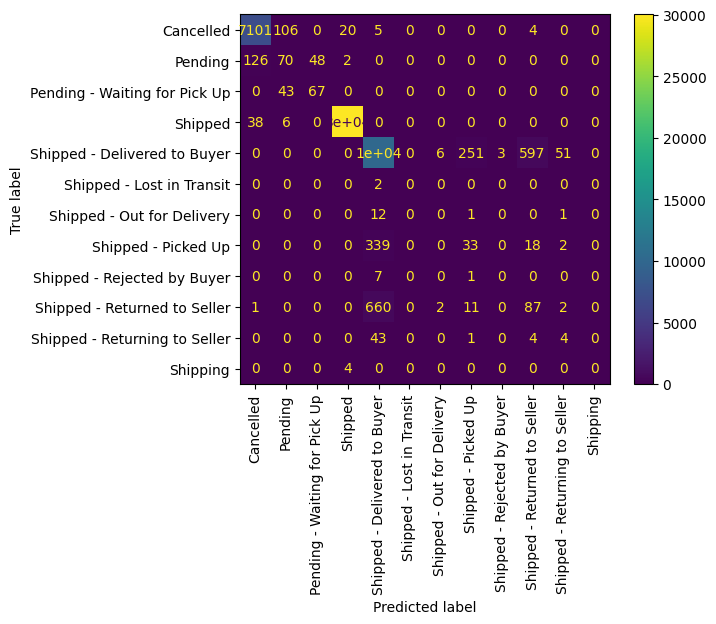

In [ ]:
import matplotlib.pyplot as plt


Decision_Tree= DecisionTreeClassifier()



# Train and evaluate the models

Decision_Tree.fit(X_train, y_train)
y_pred = Decision_Tree.predict(X_test)
print('Decision_Tree Accuracy', {accuracy_score(y_test, y_pred)})
print('Decision_Tree Precision',precision_score(y_test, y_pred, average="weighted",zero_division=1))
print('Decision_Tree Recall', {recall_score(y_test, y_pred, average="weighted")})


<Figure size 1000x1000 with 0 Axes>

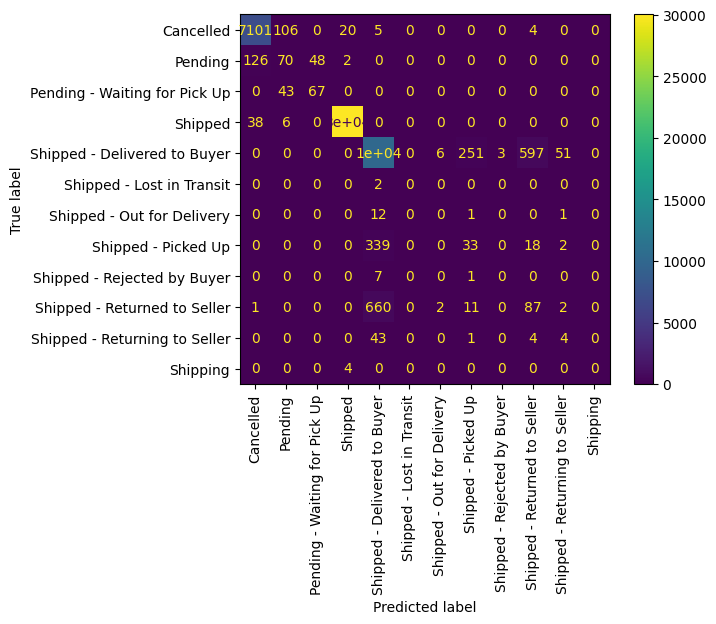

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=original_labels)
plt.figure(figsize=(10, 10))
cm_display.plot()
plt.xticks(rotation=90)
plt.savefig('/content/drive/My Drive/Colab Notebooks/Amazon Data analysis/Decision Tree Confusion Matrex.png')
plt.show()

In [ ]:
# Perform cross-validation and get scores
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define cross-validation folds

# Perform cross-validation and get scores
cv_scores = cross_val_score(Decision_Tree,features,target, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.95092147 0.95048077 0.94943708 0.95003806 0.9511599 ]
Mean CV Accuracy: 0.9504074570115503


In [ ]:
Random_Forest=RandomForestClassifier(n_estimators=100)


Random_Forest.fit(X_train, y_train)
y_pred = Random_Forest.predict(X_test)
print('Random_Forest Accuracy', {accuracy_score(y_test, y_pred)})
print('Random_Forest Precision',precision_score(y_test, y_pred, average="weighted",zero_division=1))
print('Random_Forest Recall', {recall_score(y_test, y_pred, average="weighted")})



Random_Forest Accuracy {0.9674672970211743}
Random_Forest Precision 0.9519618987223323
Random_Forest Recall {0.9674672970211743}


<Figure size 1000x1000 with 0 Axes>

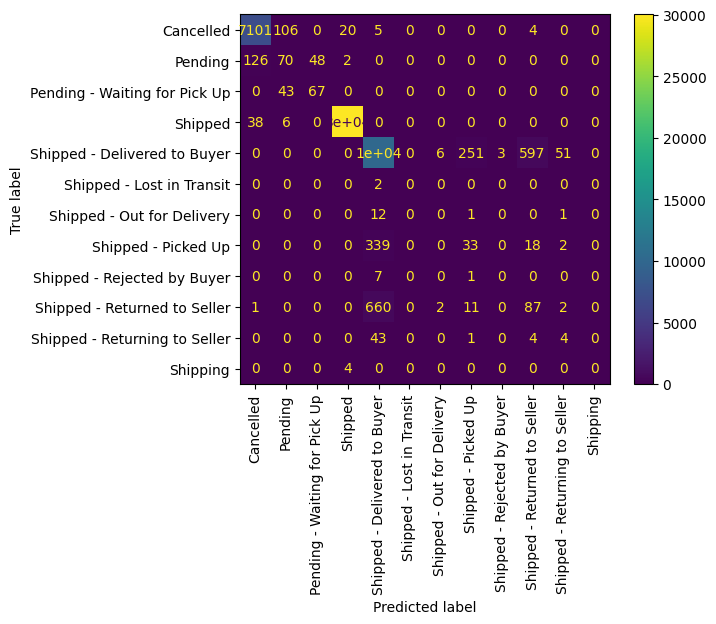

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=original_labels)
plt.figure(figsize=(10, 10))
cm_display.plot()
plt.xticks(rotation=90)
plt.savefig('/content/drive/My Drive/Colab Notebooks/Amazon Data analysis/Random Forest Confusion Matrex.png')
plt.show()

In [ ]:
#Perform cross-validation and get scores
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define cross-validation folds

# Perform cross-validation and get scores
cv_scores = cross_val_score(Random_Forest,features,target, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96738782 0.96766827 0.96874875 0.96706599 0.96830803]
Mean CV Accuracy: 0.9678357702144338
